In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.0 anndata==0.7.5 umap==0.5.1 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'result/211213_CS23_analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/CS23_processing.h5ad')           

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


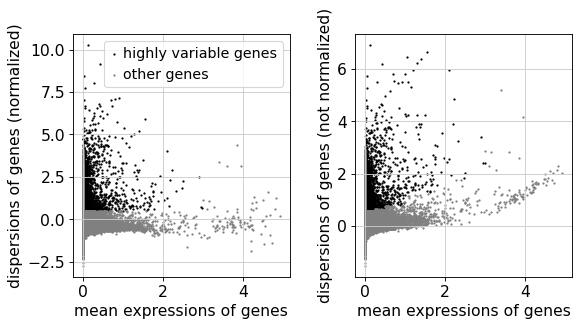

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
adata

View of AnnData object with n_obs × n_vars = 8020 × 2603
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doublet_info_colors', 'log1p', 'hvg'

In [10]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'])

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb']
    sparse input is densified and may lead to high memory use
    finished (0:00:14)


In [11]:
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=50
    finished (0:00:01)


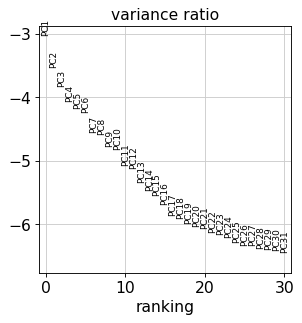

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 8020 × 2603
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [17]:
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.8, key_added = "leiden_0.8")
sc.tl.leiden(adata, resolution = 1.0, key_added = "leiden_1.0")
sc.tl.leiden(adata, resolution = 1.2, key_added = "leiden_1.2")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 13 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 26 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 28 clusters and added
    'leiden_1.2', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 31 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


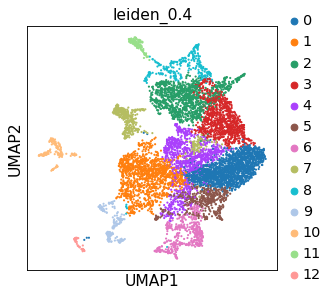

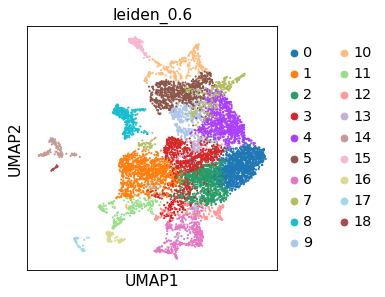

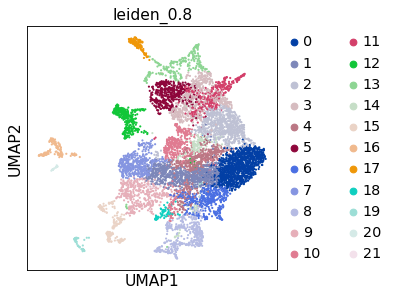

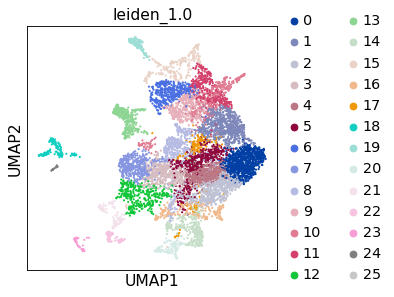

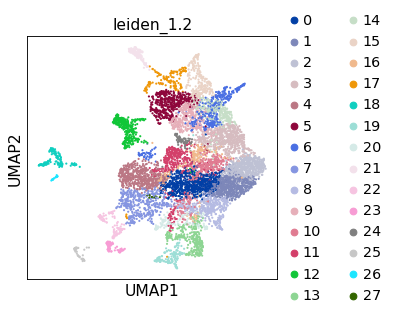

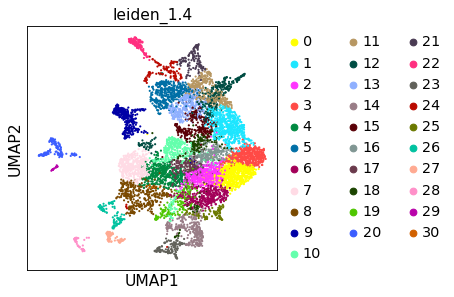

In [18]:
sc.pl.umap(adata, color='leiden_0.4')
sc.pl.umap(adata, color='leiden_0.6')
sc.pl.umap(adata, color='leiden_0.8')
sc.pl.umap(adata, color='leiden_1.0')
sc.pl.umap(adata, color='leiden_1.2')
sc.pl.umap(adata, color='leiden_1.4')

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


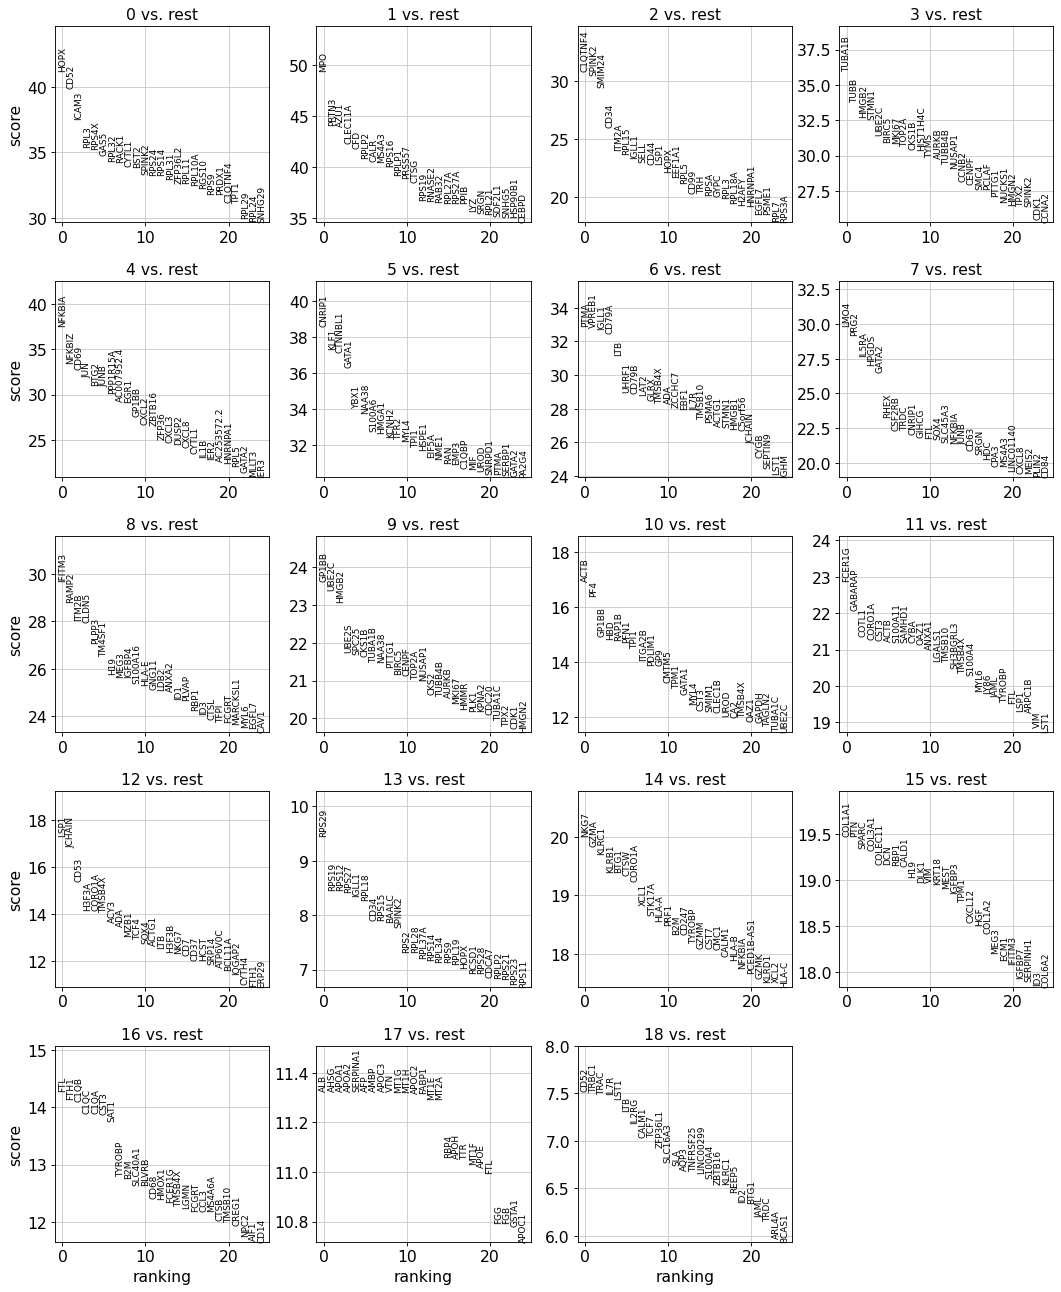

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

In [20]:
group15 = (sc.get.rank_genes_groups_df(adata, group="15", key = "wilcoxon")
          .set_index("names", drop=False))

In [21]:
group15.head()

names     scores  logfoldchanges         pvals     pvals_adj
names                                                                  
COL1A1    COL1A1  19.483377       10.845231  1.519186e-84  1.712102e-80
PTN          PTN  19.479736       11.001223  1.631195e-84  1.712102e-80
SPARC      SPARC  19.351748        7.301198  1.970433e-83  1.378778e-79
COL3A1    COL3A1  19.328190       10.807668  3.111407e-83  1.632866e-79
COLEC11  COLEC11  19.175169       10.951426  5.967399e-82  1.947827e-78

In [22]:
group15.to_csv('210812_group15_wilcoxon.tsv', sep='\t', index = False)

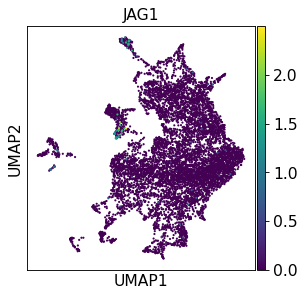

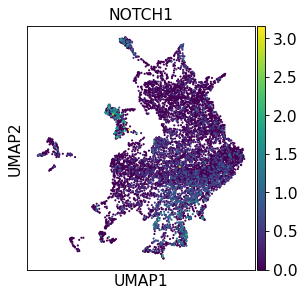

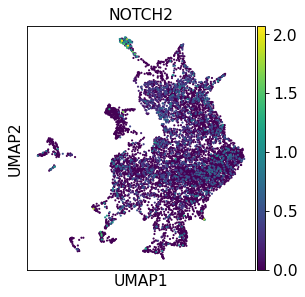

In [23]:
sc.pl.umap(adata, color='JAG1')
sc.pl.umap(adata, color='NOTCH1')
sc.pl.umap(adata, color='NOTCH2')

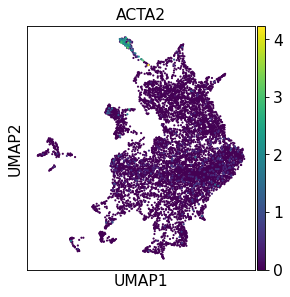

In [24]:
sc.pl.umap(adata, color='ACTA2')

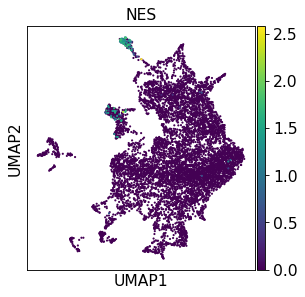

In [25]:
sc.pl.umap(adata, color='NES')

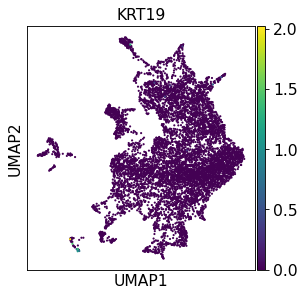

In [26]:
sc.pl.umap(adata, color='KRT19')

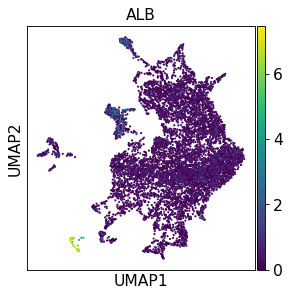

In [27]:
sc.pl.umap(adata, color='ALB')

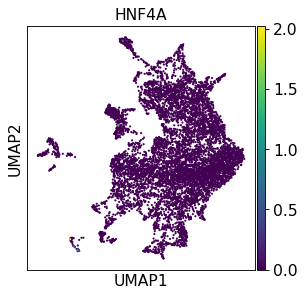

In [28]:
sc.pl.umap(adata, color='HNF4A')

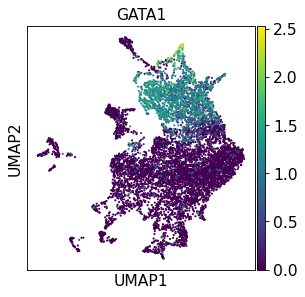

In [29]:
sc.pl.umap(adata, color='GATA1')

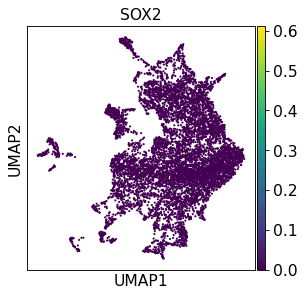

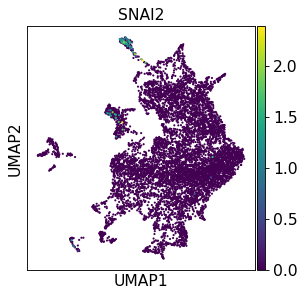

In [30]:
sc.pl.umap(adata, color='SOX2')
sc.pl.umap(adata, color='SNAI2')

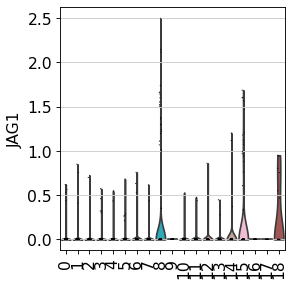

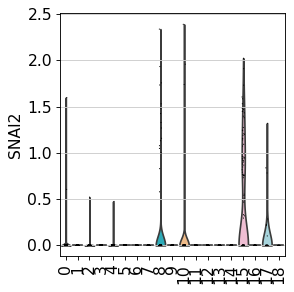

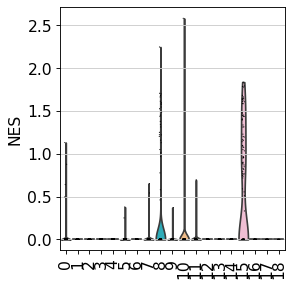

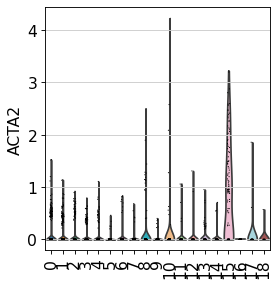

In [31]:
sc.pl.violin(adata, ['JAG1'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['SNAI2'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['NES'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['ACTA2'], groupby='leiden_0.6', rotation = 90)

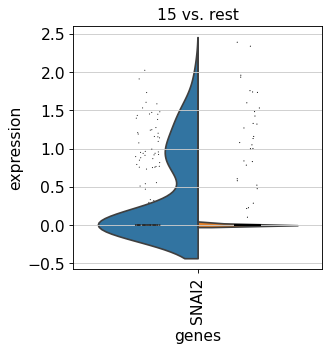

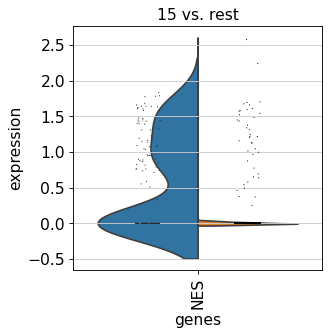

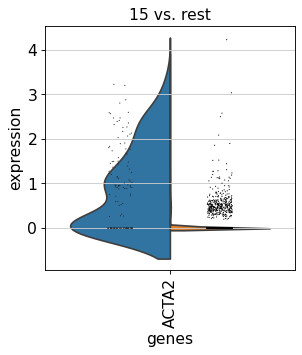

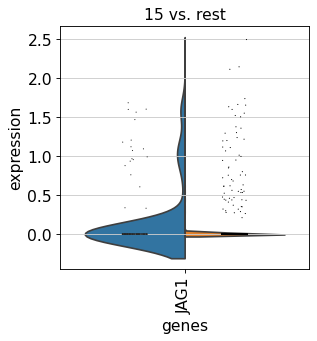

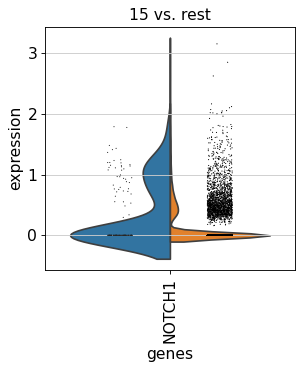

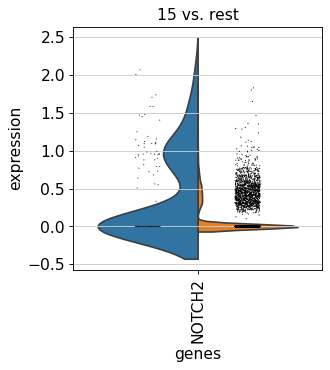

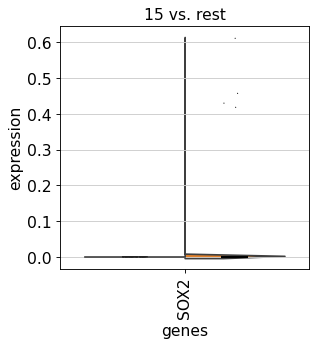

In [32]:
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['SNAI2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['NES'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['ACTA2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['JAG1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['NOTCH1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['NOTCH2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['SOX2'], key = "wilcoxon")

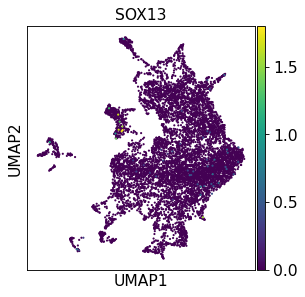

In [33]:
sc.pl.umap(adata, color='SOX13')

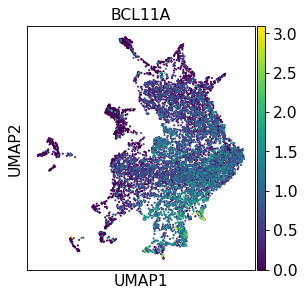

In [34]:
sc.pl.umap(adata, color='BCL11A')

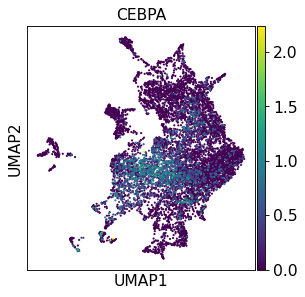

In [35]:
sc.pl.umap(adata, color='CEBPA')

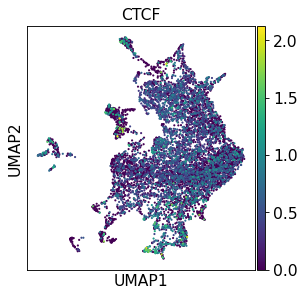

In [36]:
sc.pl.umap(adata, color='CTCF')

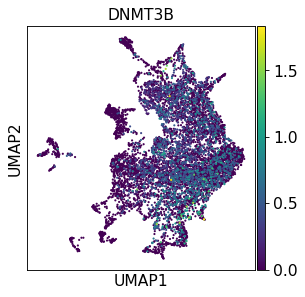

In [37]:
sc.pl.umap(adata, color='DNMT3B')

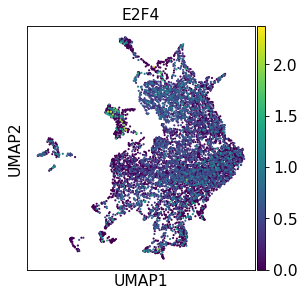

In [38]:
sc.pl.umap(adata, color='E2F4')

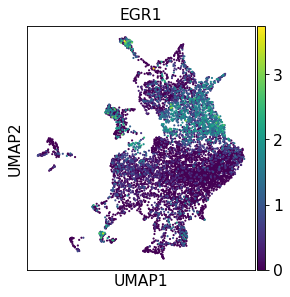

In [39]:
sc.pl.umap(adata, color='EGR1')

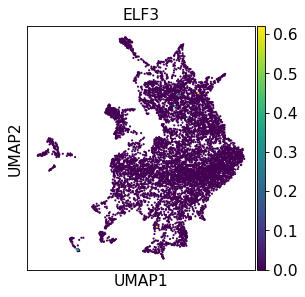

In [40]:
sc.pl.umap(adata, color='ELF3')

In [41]:
#ESR1
#sc.pl.umap(adata, color='ESRA', use_raw = True)

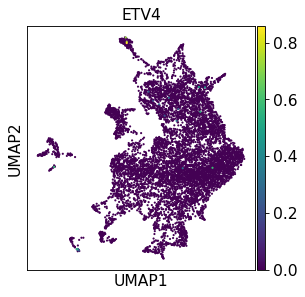

In [42]:
sc.pl.umap(adata, color='ETV4')

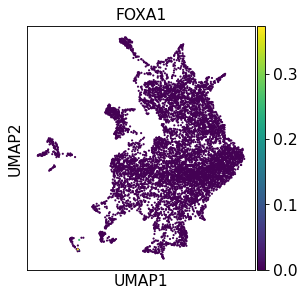

In [43]:
sc.pl.umap(adata, color='FOXA1')

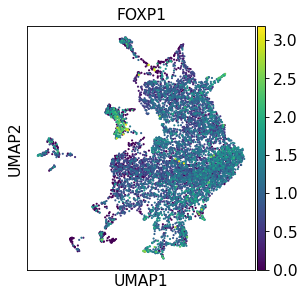

In [44]:
sc.pl.umap(adata, color='FOXP1')

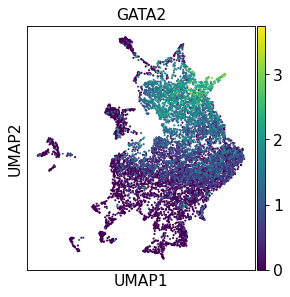

In [45]:
sc.pl.umap(adata, color='GATA2')

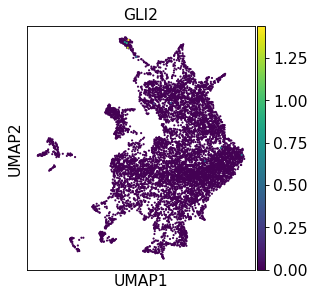

In [46]:
sc.pl.umap(adata, color='GLI2')

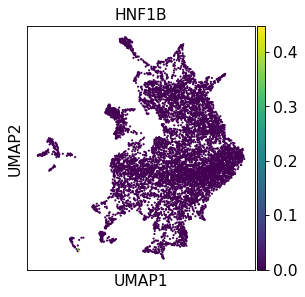

In [47]:
sc.pl.umap(adata, color='HNF1B')

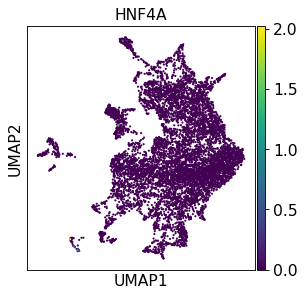

In [48]:
sc.pl.umap(adata, color='HNF4A')

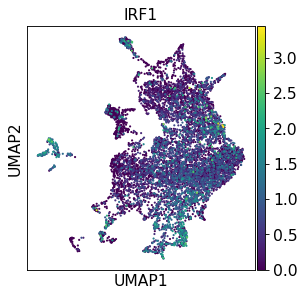

In [49]:
sc.pl.umap(adata, color='IRF1')

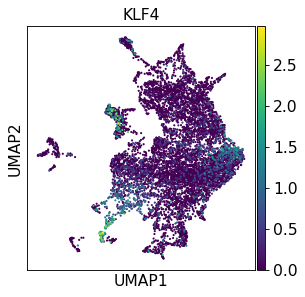

In [50]:
sc.pl.umap(adata, color='KLF4')

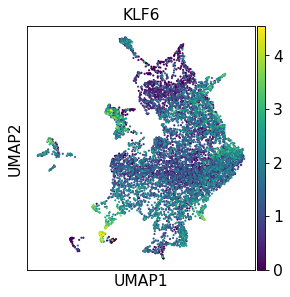

In [51]:
sc.pl.umap(adata, color='KLF6')

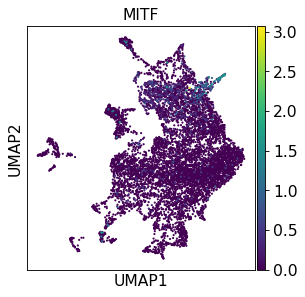

In [52]:
sc.pl.umap(adata, color='MITF')

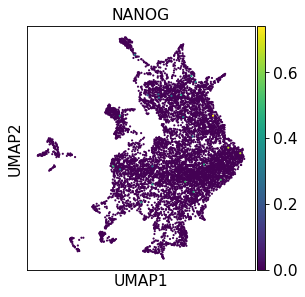

In [53]:
sc.pl.umap(adata, color='NANOG')

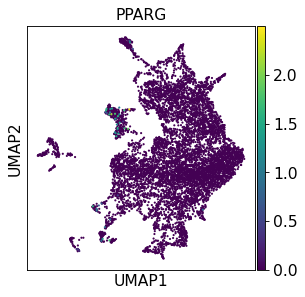

In [54]:
sc.pl.umap(adata, color='PPARG')

In [55]:
#PRDM14
#sc.pl.umap(adata, color='PRD14')

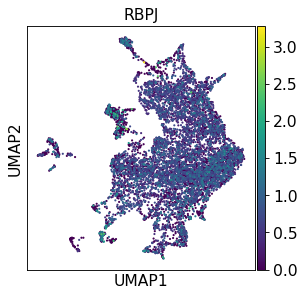

In [56]:
sc.pl.umap(adata, color='RBPJ')

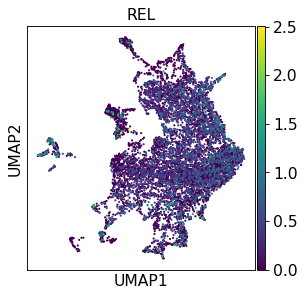

In [57]:
sc.pl.umap(adata, color='REL')

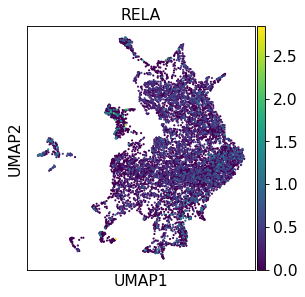

In [58]:
sc.pl.umap(adata, color='RELA')

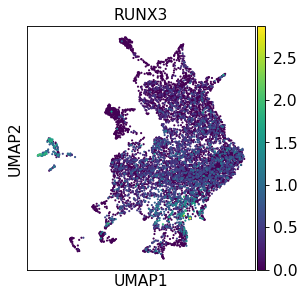

In [59]:
sc.pl.umap(adata, color='RUNX3')

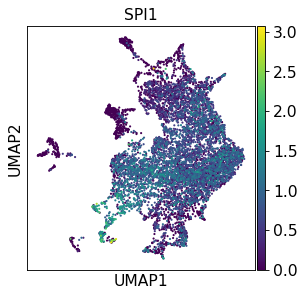

In [60]:
sc.pl.umap(adata, color='SPI1')

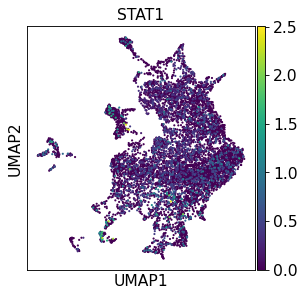

In [61]:
sc.pl.umap(adata, color='STAT1')

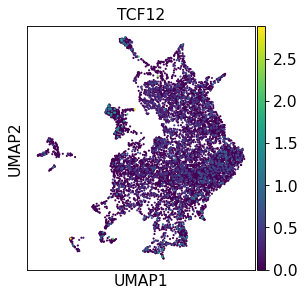

In [62]:
sc.pl.umap(adata, color='TCF12')

In [63]:
#sc.pl.umap(adata, color='TFAP2G')

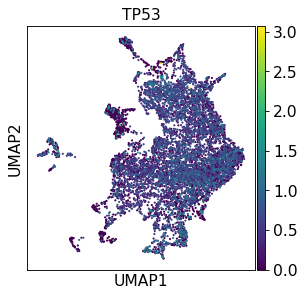

In [64]:
sc.pl.umap(adata, color='TP53')

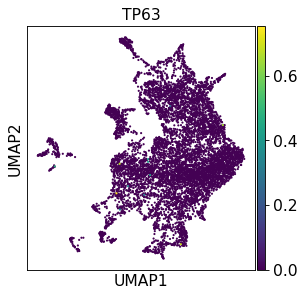

In [65]:
sc.pl.umap(adata, color='TP63')

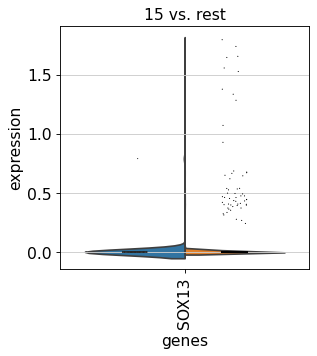

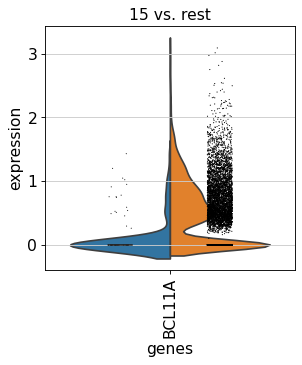

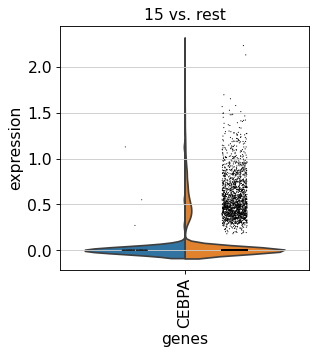

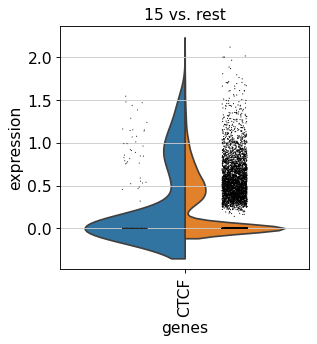

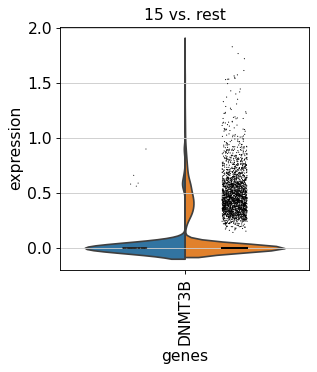

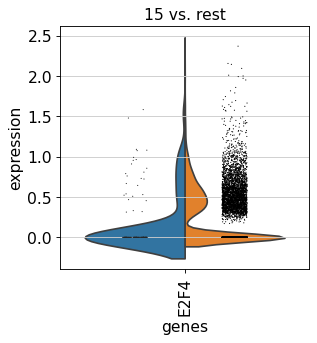

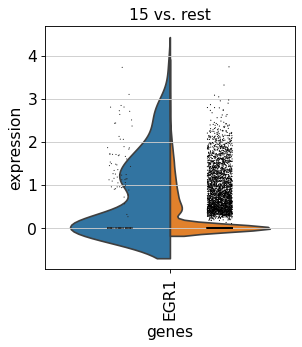

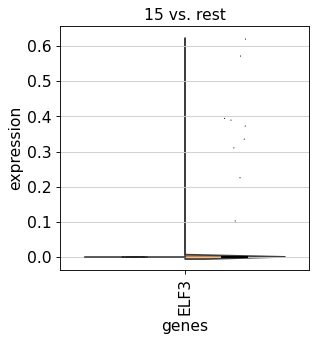

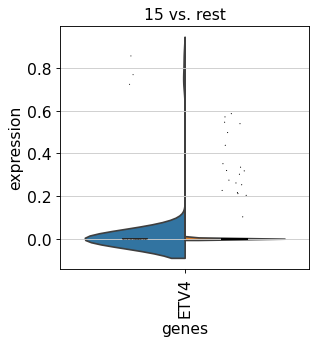

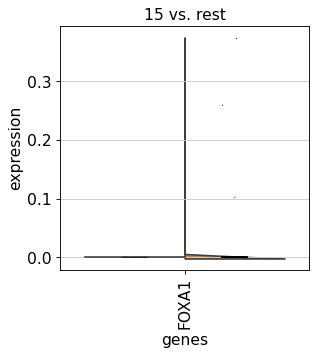

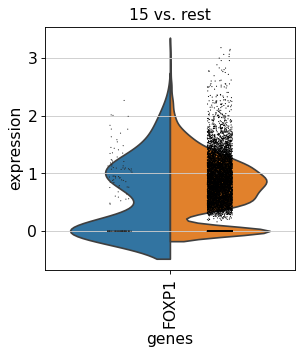

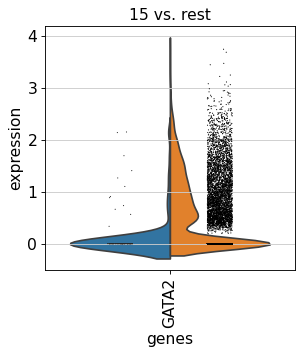

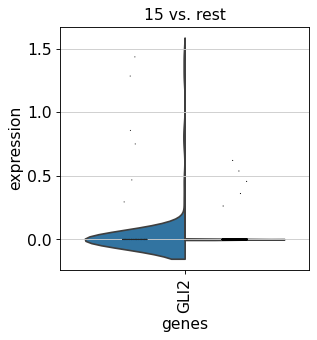

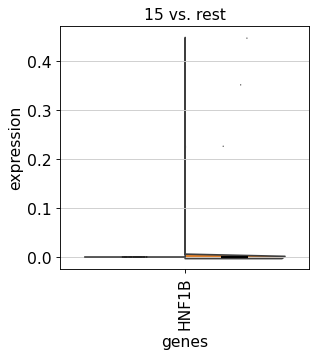

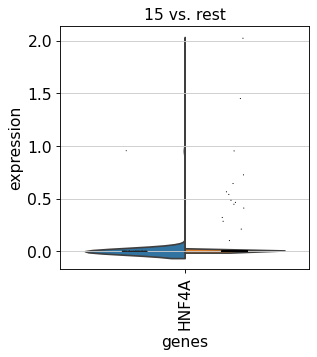

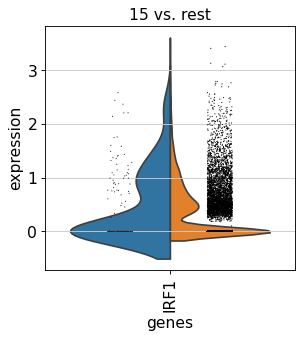

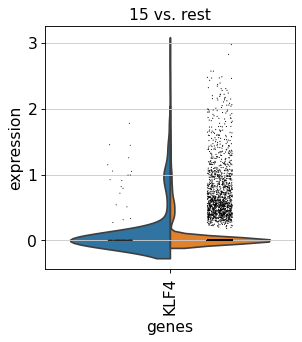

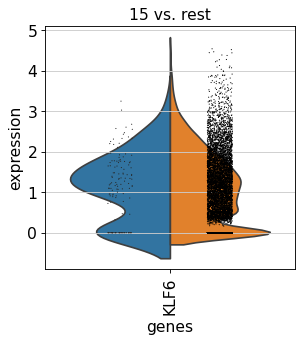

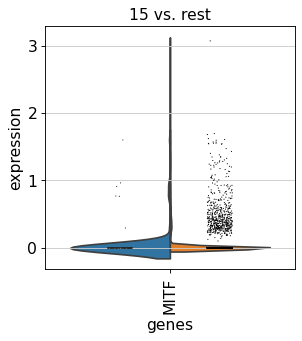

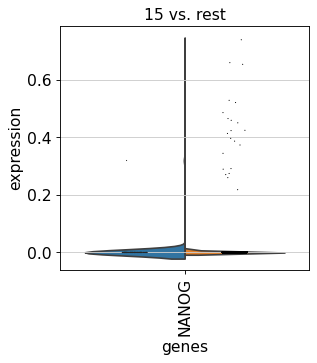

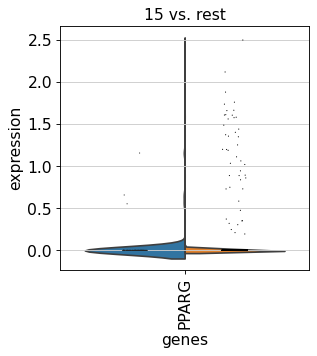

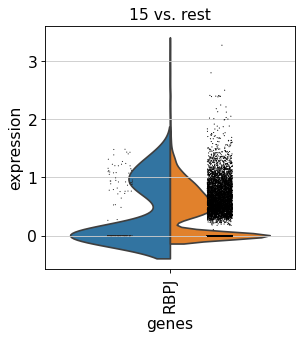

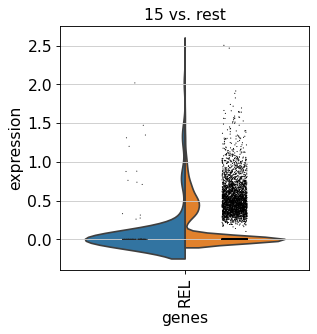

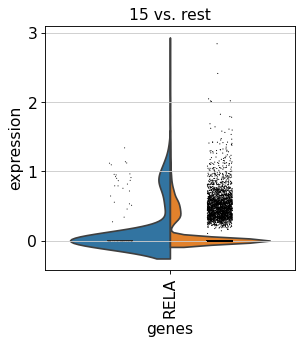

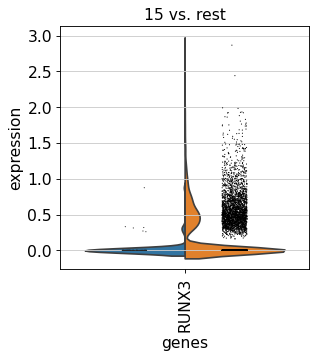

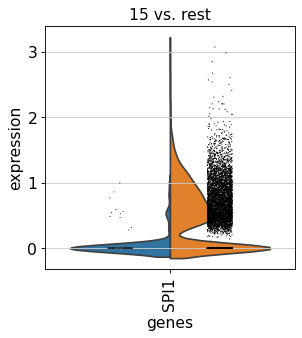

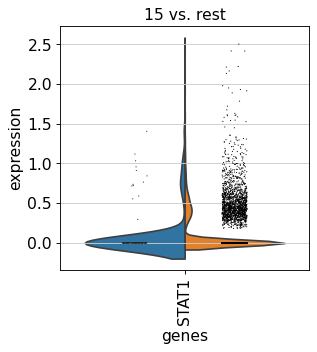

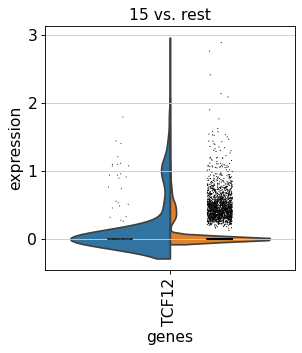

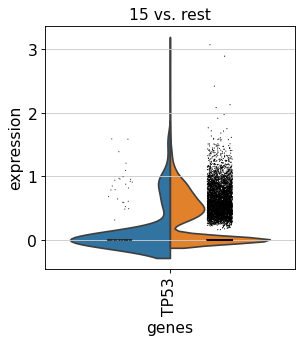

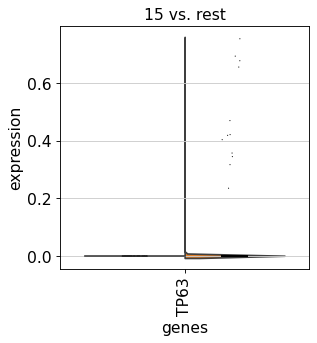

In [66]:
#For Dorothea level C~D
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['SOX13'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['BCL11A'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['CEBPA'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['CTCF'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['DNMT3B'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['E2F4'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['EGR1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['ELF3'], key = "wilcoxon")
#sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['ESR1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['ETV4'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['FOXA1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['FOXP1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['GATA2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['GLI2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['HNF1B'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['HNF4A'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['IRF1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['KLF4'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['KLF6'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['MITF'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['NANOG'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['PPARG'], key = "wilcoxon")
#sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['PRDM14'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['RBPJ'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['REL'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['RELA'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['RUNX3'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['SPI1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['STAT1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['TCF12'], key = "wilcoxon")
#sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['TFAP2C'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['TP53'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['TP63'], key = "wilcoxon")

In [67]:
adata_pv = adata[adata.obs['leiden_0.6'] == '15',:]

/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [68]:
adata_pv

View of AnnData object with n_obs × n_vars = 129 × 2603
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_1.0_colors', 'leiden_1.2_colors', 'leiden_1.4_colors', 'wilcoxon'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [69]:
adata.write(results_file)

In [70]:
CS23_pv=sc.get.obs_df(adata_pv, keys=["ACTA2","JAG1","SNAI2"])
CS23_pv.to_csv('211214_CS23_PV_JAG1_and_SNAI2.tsv', sep='\t', index = True)

In [71]:
CS23_pv_EGR1=sc.get.obs_df(adata_pv, keys=["ACTA2","JAG1","EGR1"])
CS23_pv_EGR1.to_csv('211215_CS23_PV_JAG1_and_EGR1.tsv', sep='\t', index = True)